In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S1/Office_Allyson-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (118, 24, 1)
y_train.shape =  (118, 12)
X_test.shape =  (58, 24, 1)
y_test.shape =  (58, 12)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(12))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
rnn_model.compile(optimizer=opt,loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
1/1 [==============================] - 1s 861ms/step - loss: 268.7732
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 262.1840
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 255.7721
Epoch 4/300
1/1 [==============================] - 0s 29ms/step - loss: 249.5091
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 243.3859
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 237.4003
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 231.5525
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 225.8431
Epoch 9/300
1/1 [==============================] - 0s 18ms/step - loss: 220.2732
Epoch 10/300
1/1 [==============================] - 0s 20ms/step - loss: 214.8438
Epoch 11/300
1/1 [==============================] - 0s 14ms/step - loss: 209.5559
Epoch 12/300
1/1 [==============================] - 0s 17ms/step - loss: 204.4102
Epoch 13/300
1/1 [======

In [19]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [22]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [23]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 7.247393022098643
Root Mean Squared Error for RNN Model for testing is: 5.916824712170442
Mean Absolute Error for RNN Model for training is: 5.093059997774114
Mean Absolute Error for RNN Model for testing is: 4.184179261251428
MAPE for RNN Model for training is: 0.26619954367691717
MAPE for RNN Model for testing is: 0.1966969585164353


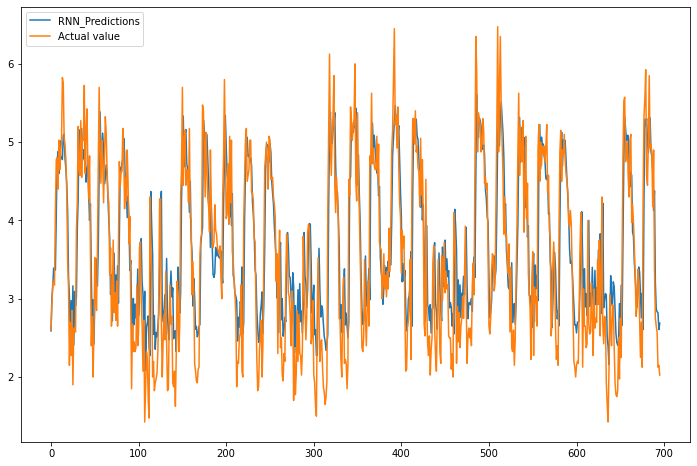

In [ ]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([2.5999999]), array([2.5890422], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([0.01095772]), array([-0.07928395]), array([0.04620552]), array([-0.16788292]), array([-0.20979524]), array([0.73509479]), array([0.70688105]), array([0.03403425]), array([-0.47903156]), array([0.42517376]), array([-0.36966705]), array([0.07465029]), array([0.21684551]), array([1.04839134]), array([0.6662674]), array([-0.05579424]), array([0.16076803]), array([0.12197208]), array([-0.11018276]), array([-0.63245726]), array([-0.15712786]), array([-0.88631249]), array([0.2192986]), array([-0.70120716]), array([0.22771764]), array([-1.26441491]), array([0.21510601]), array([-0.46838641]), array([-0.33266902]), array([0.85469365]), array([0.35241461]), array([0.94264841]), array([-0.50743771]), array([-0.18532896]), array([0.47866726]), array([-0.62476397]), array([0.28074694]), array([0.12239027]), array([0.93028164]), array([-0.45091104]), array([0.63540506]), array([0.79005289]), array([0.0119915]), array([-0.08884335]), array([0.82433033]), array([-0.53759503]), array([-0.937685

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.02538633]), array([-1.67257142]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(404, 292)